# Week 40 handin

# Handin Exercise 7

Data from https://www.dr.dk/

1) Use webscrabing to find out how many headlines contain the word 'corona'.

2) Use regex to make a list of all words that occur just before and just after coronavirus in the article at https://www.dr.dk/nyheder/indland/status-paa-coronavirus-lige-nu. 
As in "... xxx coronavirus yyy..." find the words xxx and yyy. 

3) How many hrefs link to a sub page are there on https://www.dr.dk/ for dr.dk/nyheder/..., dr.dk/sporten/..., dr.dk/mad/... and dr.dk/musik/... Make a pie chart to show the amount of sports news, food news, music news and regular news.

4) Use Selenium to click into the first news article under "seneste nyt" and print the first parapgraph of the article.

![](https://i.imgur.com/H0iye0S.png)


## 02 Status

How far you got:


## 03 Exercises

1. Use webscrabing to find out how many headlines contain the word 'corona'.

In [6]:
#Example 1
#Comment, need to recheck this.

import bs4
import requests
import re 


r = requests.get('https://www.dr.dk/')
r.raise_for_status()
soup = bs4.BeautifulSoup(r.text, 'html.parser')

title = soup.select('.dre-title-text')
title2 = soup.select('.dre-section-heading')
title3 = soup.select('.dre-teaser-title')

corona = re.compile(r'corona')

f1 = len(corona.findall(str(title)))
f2 = len(corona.findall(str(title2)))
f3 = len(corona.findall(str(title3)))

#Removing double
corona_hits = (f1+f2+f3)/2
print(corona_hits)

19.0


In [4]:
#Example 2
#Comment, need to recheck this.


import bs4
import requests
import re 


r = requests.get('https://www.dr.dk/')
r.raise_for_status()
soup = bs4.BeautifulSoup(r.text, 'html.parser')

links = soup.find_all("body")
URLless_string = re.sub(r'http\S+', '', str(links))

corona = re.compile(r'corona')
f1 = corona.findall(str(URLless_string))
corona_hits = len(f1)
print(len(f1))

#print(URLless_string)

#print(type(URLless_string))


19


2. Use regex to make a list of all words that occur just before and just after coronavirus in the article at https://www.dr.dk/nyheder/indland/status-paa-coronavirus-lige-nu. As in "... xxx coronavirus yyy..." find the words xxx and yyy.

In [8]:
#Example 1

import requests
from bs4 import BeautifulSoup

coronareg = re.compile(r'(\w+) coronavirus (\w+)')

dr = requests.get('https://www.dr.dk/nyheder/indland/status-paa-coronavirus-lige-nu')
soup = BeautifulSoup(dr.text, 'html')

#Removing hidden title
for s in soup.select('title'):
    s.extract()
    
hits = coronareg.findall(soup.text)
#Removing actual title
hits.pop(0)

print('There are',len(hits),'hits on coronavirus')
print(hits)
print(soup.text)

<class 'list'>
There are 3 hits on coronavirus
[('om', 'i'), ('på', 'i'), ('mod', 'og')]




Gå til forsiden af dr.dkNyhederTVRadioPrivatlivspolitikKontakt DRSeneste nytIndlandUdlandPengePolitikRegionaltVejretIndlandStatus på coronavirus lige nu Se de nyeste tal om coronavirus i Danmark her.(© AFP or licensors)Af DR Nyheder18. maj kl. 07:58 | opdateret 14. sep kl. 12:34Forklar ordStørre TekstLæs opI denne artikel kan du få det fulde overblik over de seneste tal for coronasmitten i Danmark - vi opdaterer løbende.Hvis du vil se detaljer om udbredelsen i resten af verden, kan du klikke her.Hvad er status i Danmark?I graferne herunder opdaterer vi løbende antallet af indlagte per dag, det totale antal smittede og dødsfald herhjemme.Der er mange grafikker i denne artikel, så det kan tage et øjeblik at loade dem. Hav tålmodighed med os.Grafen herunder viser, hvor mange danskere der er indlagt på sygehus på grund af coronavirus. Tallet er ekstremt vigtigt at holde øje med, da myndighedernes s

In [14]:
#Example 2

import requests
from bs4 import BeautifulSoup

coronareg = re.compile(r'(\w+) coronavirus (\w+)')

dr = requests.get('https://www.dr.dk/nyheder/indland/status-paa-coronavirus-lige-nu')
soup = BeautifulSoup(dr.text, 'html')
    
hits = coronareg.findall(soup.text)
#Removing actual title and hidden title in length

print('There are',len(hits)-2,'hits on coronavirus')
print(hits[2:],'\n')
print(soup.text)

There are 3 hits on coronavirus
[('om', 'i'), ('på', 'i'), ('mod', 'og')] 

Status på coronavirus lige nu | Indland | DR



Gå til forsiden af dr.dkNyhederTVRadioPrivatlivspolitikKontakt DRSeneste nytIndlandUdlandPengePolitikRegionaltVejretIndlandStatus på coronavirus lige nu Se de nyeste tal om coronavirus i Danmark her.(© AFP or licensors)Af DR Nyheder18. maj kl. 07:58 | opdateret 14. sep kl. 12:34Forklar ordStørre TekstLæs opI denne artikel kan du få det fulde overblik over de seneste tal for coronasmitten i Danmark - vi opdaterer løbende.Hvis du vil se detaljer om udbredelsen i resten af verden, kan du klikke her.Hvad er status i Danmark?I graferne herunder opdaterer vi løbende antallet af indlagte per dag, det totale antal smittede og dødsfald herhjemme.Der er mange grafikker i denne artikel, så det kan tage et øjeblik at loade dem. Hav tålmodighed med os.Grafen herunder viser, hvor mange danskere der er indlagt på sygehus på grund af coronavirus. Tallet er ekstremt vigtigt at hol

3. How many hrefs link to a sub page are there on https://www.dr.dk/ for dr.dk/nyheder/..., dr.dk/sporten/..., dr.dk/mad/... and dr.dk/musik/... Make a pie chart to show the amount of sports news, food news, music news and regular news.

153
37
0
9


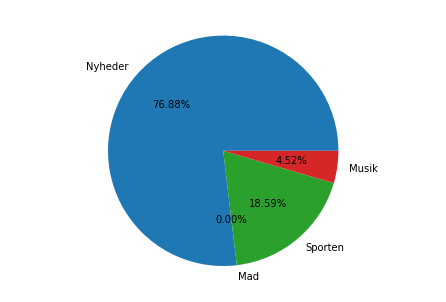

In [15]:
import bs4
import requests
import re 
from matplotlib import pyplot as plt
import numpy as np


r = requests.get('https://www.dr.dk/')
r.raise_for_status()
soup = bs4.BeautifulSoup(r.text, 'html')

#print(titel5)
nyhederreg = re.compile(r'dr.dk/nyheder/')
sportenreg = re.compile(r'dr.dk/sporten/')
madreg = re.compile(r'dr.dk/mad/')
musikreg = re.compile(r'dr.dk/musik/')


#nyheder = nyhederreg.findall(str(soup.text))
#sporten = sportenreg.findall(str(soup.text))
#mad = madreg.findall(str(soup.text))
#musik = musikreg.findall(str(soup.text))

nyheder = len(nyhederreg.findall(r.text))
sporten = len(sportenreg.findall(r.text))
mad = len(madreg.findall(r.text))
musik = len(musikreg.findall(r.text))

print((nyheder))
print((sporten))
print((mad))
print((musik))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
tags = ['Nyheder', 'Mad', 'Sporten', 'Musik']
count = [nyheder,mad,sporten,musik]
ax.pie(count, labels = tags, autopct='%1.2f%%')
plt.show()

4. Use Selenium to click into the first news article under "seneste nyt" and print the first parapgraph of the article.

In [16]:
from modules import selenium_dr

soup = selenium_dr.get_first_article_para()
print('\n\n')
title = soup.select('.hydra-latest-news-page-short-news__title')
first_title = first_paragarph = "Title:\n{}".format(title[0].text)
print(first_title)

fparagraph = soup.select('.hydra-latest-news-page-short-news__paragraph')
first_paragarph = "First Paragraph:\n{}".format(fparagraph[0].text)
print(first_paragarph)

Cookie Button <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="a172a946-78f2-4dc8-88ba-c2f3adb5bccd", element="55e4eb32-a3cf-419d-9182-5f59ddf1f305")>
Cookie Button2 <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="a172a946-78f2-4dc8-88ba-c2f3adb5bccd", element="a660c25e-2bb4-4a42-9f7f-14abd19b0a05")>



Title:
331 er registreret smittede det seneste døgn 
First Paragraph:
331 er registreret som smittede det seneste døgn, viser myndighedernes opgørelse. I går var tallet 322.
